# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.097294e+01     8.458831e+00
 * time: 0.0012450218200683594
     1     2.825900e+01     5.725603e+00
 * time: 0.0059490203857421875
     2     1.886762e+01     4.974056e+00
 * time: 0.011811971664428711
     3     1.310424e+01     3.532491e+00
 * time: 0.017606019973754883
     4     1.222376e+01     4.607097e+00
 * time: 0.022228002548217773
     5     1.182214e+01     2.856625e+00
 * time: 0.058422088623046875
     6     1.003434e+01     1.572891e+00
 * time: 0.061673879623413086
     7     8.826243e+00     1.620505e+00
 * time: 0.06461501121520996
     8     8.442698e+00     1.126253e+00
 * time: 0.0675959587097168
     9     8.286475e+00     8.558823e-01
 * time: 0.0706338882446289
    10     8.188042e+00     7.733239e-01
 * time: 0.0742959976196289
    11     8.171087e+00     1.021108e+00
 * time: 0.07742905616760254
    12     8.103592e+00     5.553353e-01
 * time: 0.07988595962524414
    13     8.058150e+00     6.366215e-01
 *

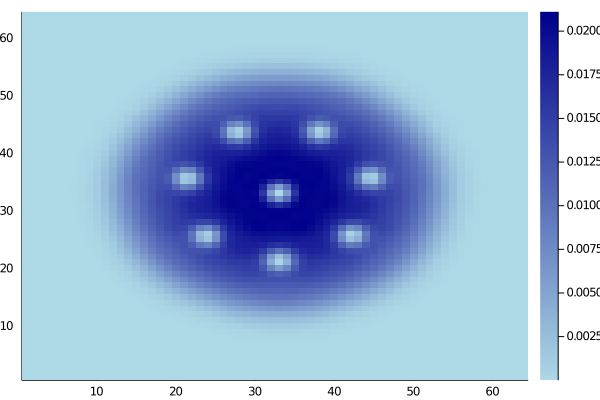

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)